In [1]:
# global var set
import transformers

# model info, change as needed
model_checkpoint = "roberta-base"
batch_size = 16
num_epochs = 16

fileTag = "clean-noCombin-v1"

model_checkpoint

'roberta-base'

# Convert dataset to suitable format
IMPORTANT: please never run this section again if you have your dataset ready!

In [2]:
import pandas as pd
from pandas import DataFrame

trainDatasetOriginal = pd.read_csv(f'../../data/csv_version/dev/emotion/allcharlinepairs-{fileTag}.csv')
testDatasetOriginal = pd.read_csv(f'../../data/csv_version/test/emotion/allcharlinepairs-{fileTag}.csv')

In [5]:
trainDatasetProcessed = DataFrame({'emotion' : trainDatasetOriginal['emotion'],
                                   'plutchik' : trainDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([trainDatasetOriginal['sentence'][:trainDatasetOriginal.shape[0]//5], trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5:trainDatasetOriginal.shape[0]//5*2], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*2:trainDatasetOriginal.shape[0]//5*3], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*3:trainDatasetOriginal.shape[0]//5*4], 
                                                trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][trainDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([trainDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:trainDatasetOriginal.shape[0]//5*4], 
                                                           trainDatasetOriginal['sentence'][trainDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < trainDatasetOriginal.shape[0]//5 else (1 if x < trainDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < trainDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < trainDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in trainDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)

testDatasetProcessed = DataFrame({'emotion' : testDatasetOriginal['emotion'],
                                   'plutchik' : testDatasetOriginal['plutchik'],
                                  'selection0': pd.concat([testDatasetOriginal['sentence'][:testDatasetOriginal.shape[0]//5], testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5:]]), 
                                  'selection1': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5:testDatasetOriginal.shape[0]//5*2], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*2:]])]), 
                                  'selection2': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*2], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*2:testDatasetOriginal.shape[0]//5*3], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*3:]])]), 
                                  'selection3': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*3], 
                                                pd.concat([testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*3:testDatasetOriginal.shape[0]//5*4], 
                                                testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][testDatasetOriginal.shape[0]//5*4:]])]),
                                  'selection4': pd.concat([testDatasetOriginal.sample(frac = 1).reset_index()['sentence'][:testDatasetOriginal.shape[0]//5*4], 
                                                           testDatasetOriginal['sentence'][testDatasetOriginal.shape[0]//5*4:]]),
                                  'label': pd.Series(0 if x < testDatasetOriginal.shape[0]//5 else (1 if x < testDatasetOriginal.shape[0]//5*2 
                                                                                               else (2 if x < testDatasetOriginal.shape[0]//5*3 
                                                                                               else (3 if x < testDatasetOriginal.shape[0]//5*4
                                                                                               else  4))) for x in testDatasetOriginal.index)}).sample(frac=1).reset_index(drop=True)


In [7]:
trainDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-train.csv')
trainDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,['sad'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He decided to sail it in the canal near his ho...,She made it home and disappointed her mother b...,She stood up quickly and knocked the bottle ov...,Cliff was recently divorced.,The wooden seat broke in half!,3
1,['happy'],"{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...",He spots a woman in trouble.,"By the end of the evening, he turned out to be...",Her husband fell in love with it and they are ...,And my daughter rode on all the rides.,We got in the car and drove to the office.,3
2,['accomplished'],"{'joy': 3, 'trust': 2, 'fear': 0, 'surprise': ...","I had to carry around a lot of cash, but I enj...",Marie decided to make chicken for dinner.,It was trying to steal my food.,He pulled in the driveway as I was finishing.,Chris got a job out of state and moved away tw...,1
3,"['hopeful', 'determined']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...","Recently, while depressed, he researched wealt...","Finally, I found the perfect ones, and promise...",He got tired after an hour and ran home to tak...,Zeke wanted to become the senator of Texas.,He caught sight of an assistant who looked jus...,3
4,['anticipation'],"{'joy': 2, 'trust': 2, 'fear': 2, 'surprise': ...",They saw monkeys and snakes and birds.,The game was getting close and nerve racking.,Marsha was thrilled to have a new best friend ...,Tonight she came from NY and asked where Peter...,His wife convinced him to buy a cheap charcoal...,1
...,...,...,...,...,...,...,...,...
42949,['happy'],"{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...","She had lived at home, then in a dorm, then wi...",Then Paul argued with the owner.,At the end of the night he took out the ring a...,We do miss our two dogs back home though.,Unfortunately his car was never recovered.,0
42950,['happy'],"{'joy': 3, 'trust': 3, 'fear': 0, 'surprise': ...","Jaiden played into the afternoon, and felt his...",He didn't want to replace it.,Caroline didn't believe in fairy tales.,She recorded all the cheers at the games.,There was very little to clean up afterwards.,0
42951,['lucky'],"{'joy': 3, 'trust': 0, 'fear': 0, 'surprise': ...","The cole-slaw smelled a bit off, but Mary set ...",They spent too much time drawing that I never ...,Joey and his daughter lived in a mobile home i...,As the neighborhood was poor it didn't belong ...,"Sadly, Mr Jefferson had a heart attack and pas...",3
42952,['hopeful'],"{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...",Henry was walking while holding Stacy.,He felt really good about the interview.,Gary saw an ad for jumping out of a plane in a...,"One evening, in Florida, he purchased candy fr...","Later that day, several people at the picnic f...",1


In [8]:
testDatasetProcessed.to_csv(f'./dataset/5Select-{fileTag}-test.csv')
testDatasetProcessed

,emotion,plutchik,selection0,selection1,selection2,selection3,selection4,label
0,['hopeful'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Jim tried out for the basketball team at school.,"There, the teller split open each roll like a ...",Lisa will never forget this birthday party.,He was hoping this year to be tall enough for ...,Ivy's party turned out to be wonderful and wel...,3
1,"['dejected', 'sad']","{'joy': 0, 'trust': 0, 'fear': 2, 'surprise': ...",One day she was playing a game with friends an...,Craig's tv broke.,Jimmy was getting bullied at school.,When he didn't find what he wanted he'd drive ...,He took his time and shot the ball and made bo...,1
2,['excited'],"{'joy': 2, 'trust': 0, 'fear': 0, 'surprise': ...",They told her that she had been late paying a ...,Stacy wanted to get her belly button pierced.,"Every day, she told him she was busy.",It eventually became healthy again after a week.,Neil was thrilled by his camel ride through th...,1
3,['satisfied'],"{'joy': 2, 'trust': 2, 'fear': 0, 'surprise': ...",Fred was happy that he had gone to church.,"Afterward, Katie noticed a pet shop and went t...",The cop told them both not to waste his time a...,He was informed that they had discontinued the...,She had been preparing for hours.,0
4,"['powerful', 'dominant']","{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",He was scary looking and she screamed when she...,Karen wanted to preserve her high position wit...,Cal was late and in a rush.,He wanted to have a taste.,She was winning the game until she made a mist...,1
...,...,...,...,...,...,...,...,...
43190,['smart'],"{'joy': 0, 'trust': 2, 'fear': 0, 'surprise': ...",Bay took a pop quiz in math.,"After doing a lot of research on laptops, he d...",Heather rushed to the hospital to see them all.,He wasn't fooled for even a minute.,I bought it and it was very tasty.,0
43191,['worried'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",We were so happy to have found this dog.,Sparky's dad took him to the animal shelter an...,She ran off and felt embarrassed for the rest ...,When lunch time came Cassie couldn't find her ...,They came and hooked up her new service.,3
43192,['mad'],"{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': ...",Suddenly she heard a loud hiss and a pop.,"Frustrated, Bob gave up and called a laundry s...",I found out and decided to let the whole commu...,The next day we went thru to collect anything ...,Brian's friend was dressed up as a Mexican.,1
43193,['anxious'],"{'joy': 0, 'trust': 0, 'fear': 3, 'surprise': ...",Jim and Theresa went for walk around their nei...,"I spoke very good Spanish, but I wasn't sure i...",Bryan slowly took the stage.,She applied them and showed her grandmother.,He got it within a couple of days and was real...,1


# load dataset

In [9]:
from datasets import load_dataset, load_metric

In [10]:
dataset = load_dataset('csv', data_files={'train': f'./dataset/5Select-{fileTag}-train.csv', 
                                           'test': f'./dataset/5Select-{fileTag}-test.csv'})

Using custom data configuration default-465e8deaa03b0346


Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to C:\Users\JAM_0\.cache\huggingface\datasets\csv\default-465e8deaa03b0346\0.0.0\433e0ccc46f9880962cc2b12065189766fbb2bee57a221866138fb9203c83519. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [11]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 42954
    })
    test: Dataset({
        features: ['Unnamed: 0', 'emotion', 'plutchik', 'selection0', 'selection1', 'selection2', 'selection3', 'selection4', 'label'],
        num_rows: 43195
    })
})

In [12]:
dataset['test'][0]

{'Unnamed: 0': 0,
 'emotion': "['hopeful']",
 'plutchik': "{'joy': 0, 'trust': 0, 'fear': 0, 'surprise': 0, 'sadness': 0, 'disgust': 0, 'anger': 0, 'anticipation': 2}",
 'selection0': 'Jim tried out for the basketball team at school.',
 'selection1': 'There, the teller split open each roll like a tube of dough.',
 'selection2': 'Lisa will never forget this birthday party.',
 'selection3': 'He was hoping this year to be tall enough for the coaster.',
 'selection4': "Ivy's party turned out to be wonderful and well-planned!",
 'label': 3}

In [13]:
def show_one(example):
    print(f"Context: {example['emotion']}")
    print(f"  A - {example['selection0']}")
    print(f"  B - {example['selection1']}")
    print(f"  C - {example['selection2']}")
    print(f"  D - {example['selection3']}")
    print(f"  E - {example['selection4']}")
    print(f"\nGround truth: option {['A', 'B', 'C', 'D', 'E'][example['label']]}")

In [14]:
show_one(dataset["train"][2])

Context: ['accomplished']
  A - I had to carry around a lot of cash, but I enjoyed myself.
  B - Marie decided to make chicken for dinner.
  C - It was trying to steal my food.
  D - He pulled in the driveway as I was finishing.
  E - Chris got a job out of state and moved away two weeks later.

Ground truth: option B


# Preprocessing Data

In [15]:
from transformers import AutoTokenizer
    
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [18]:
selectionList = ["selection0", "selection1", "selection2", "selection3", "selection4"]

def preprocess_function(examples):
    # Repeat each first sentence four times to go with the four possibilities of second sentences.
    first_sentences = [["The following sentences contain emotions: {}".format(context.strip("[").strip("]").replace('\'', '')) ]*5 for context in examples["emotion"]]
    # Grab all second sentences possible for each context.
    second_sentences = [[examples[selection][index] for selection in selectionList] for index in range(len(examples['selection0']))]

    # Flatten everything
    first_sentences = sum(first_sentences, [])
    second_sentences = sum(second_sentences, [])
    
    # Tokenize
    tokenized_examples = tokenizer(first_sentences, second_sentences, truncation=True)
    # Un-flatten
    # print(tokenized_examples.items())
    return {k: [v[i:i+5] for i in range(0, len(v), 5)] for k, v in tokenized_examples.items()}

In [19]:
examples = dataset["train"][:5]
features = preprocess_function(examples)
print(len(features["input_ids"]), len(features["input_ids"][0]), [len(x) for x in features["input_ids"][0]])

5 5 [23, 23, 24, 17, 18]


In [21]:
[tokenizer.decode(features["input_ids"][a][i]) for a in range(5) for i in range(5) ]

['<s>The following sentences contain emotions: sad</s></s>He decided to sail it in the canal near his house.</s>',
 '<s>The following sentences contain emotions: sad</s></s>She made it home and disappointed her mother by forgetting things.</s>',
 '<s>The following sentences contain emotions: sad</s></s>She stood up quickly and knocked the bottle over on her table.</s>',
 '<s>The following sentences contain emotions: sad</s></s>Cliff was recently divorced.</s>',
 '<s>The following sentences contain emotions: sad</s></s>The wooden seat broke in half!</s>',
 '<s>The following sentences contain emotions: happy</s></s>He spots a woman in trouble.</s>',
 '<s>The following sentences contain emotions: happy</s></s>By the end of the evening, he turned out to be a pretty cool guy.</s>',
 '<s>The following sentences contain emotions: happy</s></s>Her husband fell in love with it and they are moving in next week.</s>',
 '<s>The following sentences contain emotions: happy</s></s>And my daughter rod

In [22]:
encoded_datasets = dataset.map(preprocess_function, batched=True)

  0%|          | 0/43 [00:00<?, ?ba/s]

  0%|          | 0/44 [00:00<?, ?ba/s]

# Fine-tuning the model

In [23]:
from transformers import AutoModelForMultipleChoice, TrainingArguments, Trainer

model = AutoModelForMultipleChoice.from_pretrained(model_checkpoint)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultipleChoice: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMultipleChoice from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultipleChoice were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predi

In [24]:
model_name = model_checkpoint.split("/")[-1]
args = TrainingArguments(
    f"{model_name}-finetuned-emotionCommonsense",
    evaluation_strategy = "epoch",
    #learning_rate=5e-5, # for bert-base
    learning_rate=5e-7, # for roberta-base
    # learning_rate=1e-3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    weight_decay=0.01,
    push_to_hub=False,
)

In [25]:
from dataclasses import dataclass
from transformers.tokenization_utils_base import PreTrainedTokenizerBase, PaddingStrategy
from typing import Optional, Union
import torch

@dataclass
class DataCollatorForMultipleChoice:
    """
    Data collator that will dynamically pad the inputs for multiple choice received.
    """

    tokenizer: PreTrainedTokenizerBase
    padding: Union[bool, str, PaddingStrategy] = True
    max_length: Optional[int] = None
    pad_to_multiple_of: Optional[int] = None

    def __call__(self, features):
        label_name = "label" if "label" in features[0].keys() else "labels"
        labels = [feature.pop(label_name) for feature in features]
        batch_size = len(features)
        num_choices = len(features[0]["input_ids"])
        flattened_features = [[{k: v[i] for k, v in feature.items()} for i in range(num_choices)] for feature in features]
        flattened_features = sum(flattened_features, [])
        
        batch = self.tokenizer.pad(
            flattened_features,
            padding=self.padding,
            max_length=self.max_length,
            pad_to_multiple_of=self.pad_to_multiple_of,
            return_tensors="pt",
        )
        
        # Un-flatten
        batch = {k: v.view(batch_size, num_choices, -1) for k, v in batch.items()}
        # Add back labels
        batch["labels"] = torch.tensor(labels, dtype=torch.int64)
        return batch

In [26]:
accepted_keys = ["input_ids", "attention_mask", "label"]
features = [{k: v for k, v in encoded_datasets["train"][i].items() if k in accepted_keys} for i in range(10)]
batch = DataCollatorForMultipleChoice(tokenizer)(features)

In [27]:
[tokenizer.decode(batch["input_ids"][8][i].tolist()) for i in range(5)]

['<s>The following sentences contain emotions: amused</s></s>She simply laughed and called over her sister.</s><pad><pad><pad><pad><pad><pad><pad><pad>',
 "<s>The following sentences contain emotions: amused</s></s>Her grandma didn't have cable and nothing was on.</s><pad><pad><pad><pad><pad><pad>",
 '<s>The following sentences contain emotions: amused</s></s>He sat on the porch yelling at nobody.</s><pad><pad><pad><pad><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: amused</s></s>When the ham ran out I forgot what other food tasted like.</s><pad><pad><pad><pad>',
 '<s>The following sentences contain emotions: amused</s></s>Russell made a joke in the back of class.</s><pad><pad><pad><pad><pad><pad><pad>']

In [28]:
show_one(dataset["train"][8])

Context: ['amused']
  A - She simply laughed and called over her sister.
  B - Her grandma didn't have cable and nothing was on.
  C - He sat on the porch yelling at nobody.
  D - When the ham ran out I forgot what other food tasted like.
  E - Russell made a joke in the back of class.

Ground truth: option A


# Trainer Defined

In [29]:
import numpy as np

valStored = []
def compute_metrics(eval_predictions):
    predictions, label_ids = eval_predictions
    preds = np.argmax(predictions, axis=1)
    valStored.append((preds != label_ids).astype(np.float32));
    return {"accuracy": (preds == label_ids).astype(np.float32).mean().item()}

In [79]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_datasets["train"],
    eval_dataset=encoded_datasets["test"],
    tokenizer=tokenizer,
    data_collator=DataCollatorForMultipleChoice(tokenizer),
    compute_metrics=compute_metrics,
)

In [80]:
!nvidia-smi

Fri Jun 17 05:08:35 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.23       Driver Version: 511.23       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:09:00.0  On |                  N/A |
| 30%   40C    P2    68W / 350W |  13376MiB / 24576MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [81]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 0.5 GB
Cached:    7.6 GB


In [82]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.678000,0.591944,0.716912
2,0.549700,0.479495,0.779905
3,0.482700,0.457887,0.789698
4,0.471500,0.438942,0.795995
5,0.460800,0.432413,0.799722
6,0.434800,0.434317,0.801181
7,0.444400,0.429941,0.804213
8,0.433400,0.425862,0.805510
9,0.417800,0.425906,0.806945
10,0.420700,0.425732,0.808265


TrainOutput(global_step=42960, training_loss=0.45674537289298, metrics={'train_runtime': 3240.1255, 'train_samples_per_second': 13.259, 'total_flos': 312197353314264.0, 'epoch': 16.0})

出现validation loss 上升情况大多是训练集验证集数据分布不一致，或者训练集过小，未包含验证集中所有情况，
也就是过拟合导致的。而解决这种现象可以尝试以下几种策略：
1. 增加训练样本增加正则项系数权重，
2. 减小过拟合加入早停机制，ValLoss上升几个epoch直接停止
3. 采用Focal Loss
4. 加入Label Smoothing

# Store Value

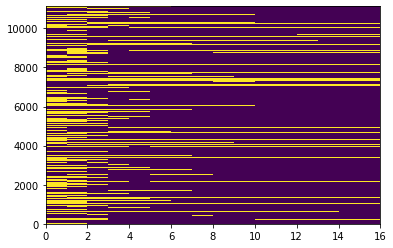

In [56]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

Z = np.transpose(valStored)

fig, ax = plt.subplots()
ax.pcolormesh(Z)

In [57]:
import pandas as pd

dataLog = pd.DataFrame(trainer.state.log_history)
dataLog.to_csv(f'./trainingMetric/emotion/2-1/trainingInfo-{model_checkpoint}-{fileTag}.csv')

In [58]:
evaluationIterationResult = pd.DataFrame(np.transpose(valStored))
evaluationIterationResult.to_csv(f'./trainingMetric/emotion/2-1/evaluationSpecificInfo-{model_checkpoint}-{fileTag}.csv')